In [1]:
import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
staf_factory = StafFactory('csvs_dr_test')

external_inflows = staf_factory.build_stafs(['1'])
internal_stafs = staf_factory.build_stafs([])
external_outflows = staf_factory.build_stafs(['2','3'])

ref_material = staf_factory.build_material('1')
ref_timeframe = staf_factory.build_timeframe('1')

In [3]:
umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows
)

In [4]:
res_inflows = umis_diagram.get_external_inflows()
res_dict = umis_diagram.get_process_stafs_dict()
res_outflows = umis_diagram.get_external_outflows()

In [5]:
for x in res_inflows:
    print(x)
    
print()
print()

for key, values in res_dict.items():
    print(key)
    for val in values:
        print(val)
    print()
    
print()
print()

for x in res_outflows:
    print("Outflows")
    print(x)

Staf: Flow1, ID: 1


Process: TP2: Test Process 2, STAFDB ID: 2



Outflows
Staf: Flow2, ID: 3
Outflows
Staf: Stock1, ID: 2


In [6]:
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_timeframe)

/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [7]:
sample_size = 3000

with math_model.pm_model:
    trace = pm.sample(sample_size, init='advi')


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  0%|          | 0/200000 [00:00<?, ?it/s]/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 9.6105:   4%|▍         | 8796/200000 [00:07<03:10,

In [8]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; 

Estimates of: External Inflows

Input Flow: Flow1: 100.00008444814534


Estimates of: Internal Stafs



Estimates of: External Outflows

Output Flow: Stock1: 70.00007205619227
TC: Stock1: 0.700000129424796
Output Flow: Flow2: 30.000012391953085
TC: Flow2: 0.2999998705752041




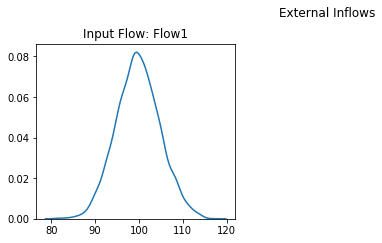

<Figure size 648x0 with 0 Axes>

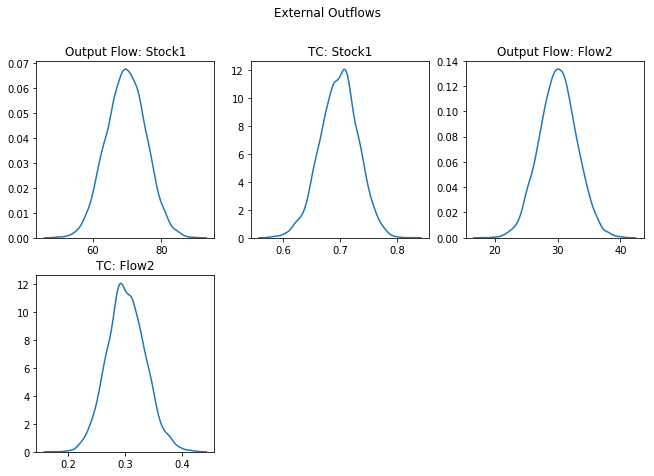

In [9]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)

In [10]:
import numpy as np


In [11]:
stock_trace = trace[math_model.STAF_VAR_NAME]

In [46]:
print(np.mean(stock_trace[:, 0, 2]))
print(np.std(stock_trace[:, 0, 2]))

69.75049179754555
5.757564069618509


In [20]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Staf_1_2-2_1,99.812334,4.994784,0.114381,90.022055,109.497861,1525.381751,1.001109
P_2_1,0.301909,0.033348,0.000534,0.236573,0.367834,3481.247790,1.000441
TCs__0_0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
TCs__0_1,0.301909,0.033348,0.000534,0.236573,0.367834,3481.247790,1.000441
TCs__0_2,0.698091,0.033348,0.000534,0.632166,0.763427,3481.247790,1.000441
TCs__1_0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
TCs__1_1,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
TCs__1_2,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
TCs__2_0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
TCs__2_1,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
